In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import make_uniform, make_joint, make_joint3, plot_contour, compute_probs

In [3]:
N, K, n = 100, 23, 19
ks = np.arange(12)
ps = ss.hypergeom(N, K, n).pmf(ks)
ps

array([3.83666200e-03, 2.84173101e-02, 9.37771233e-02, 1.82942257e-01,
       2.36054525e-01, 2.13573142e-01, 1.40157374e-01, 6.80764389e-02,
       2.47550687e-02, 6.77377501e-03, 1.39460074e-03, 2.14977979e-04])

(4, 4.369676742462914)

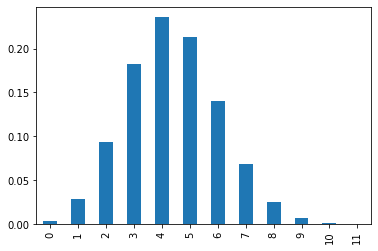

In [4]:
pmf = Pmf(ps, ks)
pmf.plot.bar()
pmf.idxmax(), pmf.mean()

In [5]:
qs = np.arange(50, 501)
prior_N = make_uniform(qs, name='N')
Ns = prior_N.qs
K, n, k = 23, 19, 4
likelihood = ss.hypergeom(Ns, K, n).pmf(k)

In [6]:
posterior_N = prior_N * likelihood
posterior_N.normalize()

0.07755224277106727

(109, 173.79880627085637, array([ 77., 363.]))

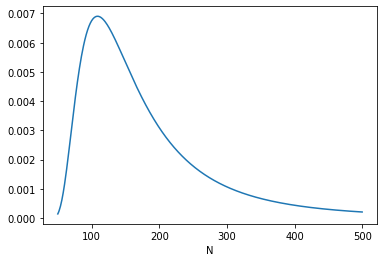

In [7]:
posterior_N.plot()
posterior_N.idxmax(), posterior_N.mean(), posterior_N.credible_interval(0.9)

In [8]:
N = 100
K, n, k = 23, 19, 4
k10 = K - k
k01 = n - k
k11 = k
observed = k10 + k01 + k11
k00 = N - observed
x = [k00, k01, k10, k11]

In [9]:
p = 0.2
q = 1 - p
y = [q*q, q*p, p*q, p*p]

In [10]:
likelihood = ss.multinomial(N, y).pmf(x)
likelihood

0.0016664011988507257

In [11]:
qs_N = np.arange(50, 501)
prior_N = make_uniform(qs_N, name='N')
qs_p = np.linspace(0, 0.99, 100)
prior_p = make_uniform(qs_p, name='p')
prior = make_joint(prior_p, prior_N)
joint_pmf = Pmf(prior.stack())

In [12]:
likelihood = joint_pmf.copy()

In [13]:
observed = k01 + k10 + k11
for N, p in joint_pmf.index:
    k00 = N - observed
    x = [k00, k01, k10, k11]
    q = 1 - p
    y = [q*q, q*p, p*q, p*p]
    likelihood[N, p] = ss.multinomial(N, y).pmf(x)

In [14]:
likelihood

50   0.00    0.000000e+00
     0.01    9.284825e-60
     0.02    2.266233e-47
     0.03    3.110181e-40
     0.04    3.014280e-35
                 ...     
500  0.95    0.000000e+00
     0.96    0.000000e+00
     0.97    0.000000e+00
     0.98    0.000000e+00
     0.99    0.000000e+00
Name: , Length: 45100, dtype: float64

In [15]:
posterior = joint_pmf * likelihood
posterior.normalize()
joint_posterior = posterior.unstack()

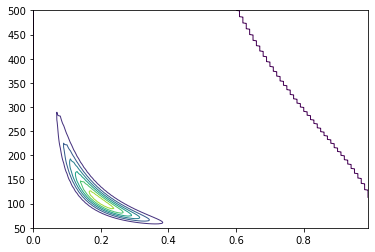

In [16]:
plot_contour(joint_posterior)

In [17]:
posterior_p2 = posterior.marginal(1)
posterior_N2 = posterior.marginal(0)

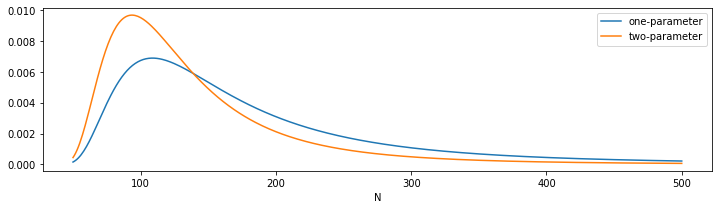

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
posterior_N.plot(ax=ax, label='one-parameter')
posterior_N2.plot(ax=ax, label='two-parameter')
plt.legend()
plt.show()

In [21]:
qs_N = np.arange(32, 350, 5)
qs_p = np.linspace(0, 1, 51)
prior_N = make_uniform(qs_N, name='N')
prior_p0 = make_uniform(qs_p, name='p0')
prior_p1 = make_uniform(qs_p, name='p1')
prior = make_joint3(prior_N, prior_p0, prior_p1)
prior

32   0.0  0.00    0.000002
          0.01    0.000002
          0.02    0.000002
          0.03    0.000002
          0.04    0.000002
                    ...   
347  1.0  0.96    0.000002
          0.97    0.000002
          0.98    0.000002
          0.99    0.000002
          1.00    0.000002
Name: , Length: 652864, dtype: float64

In [20]:
K, n, k = 20, 15, 3
k10 = K - k
k01 = n - k
k11 = k
data = np.array([0, k01, k10, k11])

In [22]:
likelihood = prior.copy()
observed = data.sum()
x = data.copy()
for N, p0, p1 in prior.index:
    x[0] = N - observed
    y = compute_probs(p0, p1)
    likelihood[N, p0, p1] = ss.multinomial(N, y).pmf(x)

In [23]:
posterior = prior * likelihood
posterior.normalize()

9.118391301358123e-06

In [24]:
posterior_N = posterior.marginal(0)
posterior_p0 = posterior.marginal(1)
posterior_p1 = posterior.marginal(2)

<AxesSubplot:>

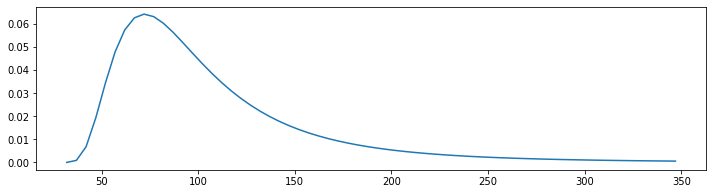

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
posterior_N.plot(ax=ax)

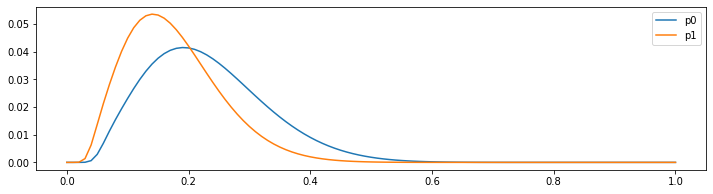

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
posterior_p0.plot(ax=ax, label='p0')
posterior_p1.plot(ax=ax, label='p1')
plt.legend()
plt.show()

In [27]:
posterior.idxmax()

(92, 0.22, 0.16)